# Gender Recognition by voice

<img src="https://d1sr9z1pdl3mb7.cloudfront.net/wp-content/uploads/2018/01/09162655/voice-biometrics-large1-1024x448.jpg"  width="700" height="100" />

### Problem Statement

##### Gender Recognition by Voice and Speech Analysis

##### This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech

### Import Data

In [148]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#import category_encoders as ce #encoding
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA #dim red
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 



%matplotlib inline

### Reading the comma separated values file into the dataframe

In [149]:
GenReg_ds = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')

In [150]:
GenReg_ds.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


   The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz

In [151]:
GenReg_ds.shape

(3168, 21)

In [152]:
GenReg_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [153]:
GenReg_ds.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


#### To find count of Null values

In [154]:
GenReg_ds.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

 There is no null values in this dataset.

### To find the category type features

In [155]:
GenReg_ds.select_dtypes(include=['object']).head()

,label
0,male
1,male
2,male
3,male
4,male


In [156]:
print("Total number of labels : {} ".format(GenReg_ds.shape[0]))
print("Total number of males : {}".format(GenReg_ds[GenReg_ds.label=='male'].shape[0]))
print("Total number of females : {}".format(GenReg_ds[GenReg_ds.label=='female'].shape[0]))

Total number of labels : 3168 
Total number of males : 1584
Total number of females : 1584


### Checking the correlation between each feature

In [157]:
GenReg_ds.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


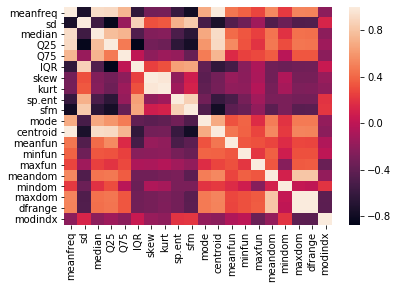

In [158]:
sb.heatmap( GenReg_ds.corr());

Centroid and dfrange both are having more correlated. So, we are going to drop both features.

In [159]:
GenReg_ds.drop(['centroid'], axis=1, inplace=True)

In [160]:
GenReg_ds.drop(['dfrange'], axis=1, inplace=True)

In [161]:
GenReg_ds.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'meanfun', 'minfun', 'maxfun', 'meandom',
       'mindom', 'maxdom', 'modindx', 'label'],
      dtype='object')

Text(0, 0.5, 'No. of persons')

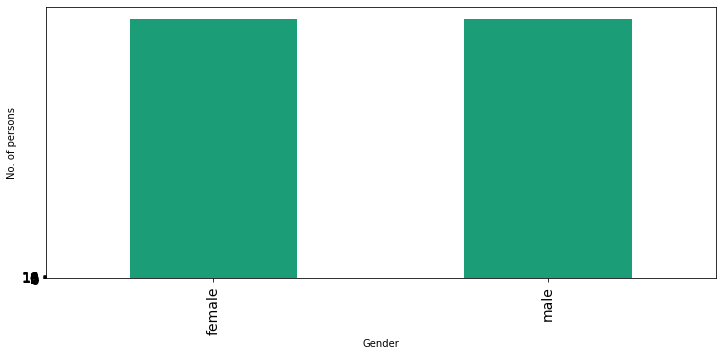

In [162]:
GenReg_ds['label'].value_counts().plot(kind='bar',figsize = (12,5),fontsize = 14,colormap='Dark2', yticks=np.arange(0, 19, 2))
plt.xlabel('Gender')
plt.ylabel('No. of persons')

In [163]:
Male_df = GenReg_ds.loc[GenReg_ds.label == "male"]
Female_df = GenReg_ds.loc[GenReg_ds.label == "female"]
print(Male_df.shape)
print(Female_df.shape)

(1584, 19)
(1584, 19)


Text(0.5, 1.0, 'Mean Frequency for Male persons')

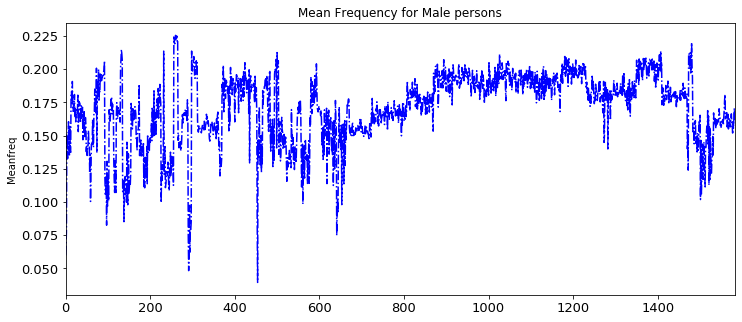

In [164]:
Male_df['meanfreq'].plot(kind='line', figsize=(12,5), color='blue', fontsize=13, linestyle='-.')
plt.ylabel('Meanfreq')
plt.title('Mean Frequency for Male persons')

Text(0.5, 1.0, 'Mean Frequency for Female persons')

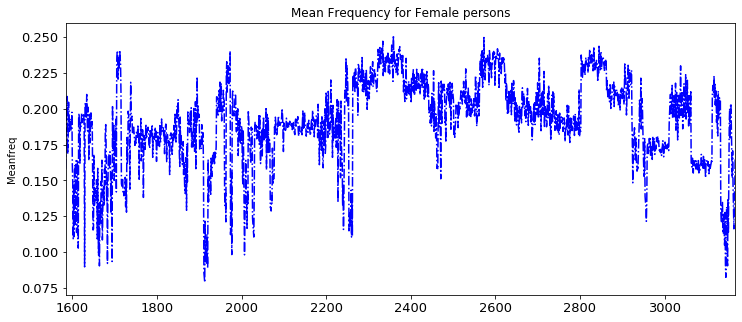

In [165]:
Female_df['meanfreq'].plot(kind='line', figsize=(12,5), color='blue', fontsize=13, linestyle='-.')
plt.ylabel('Meanfreq')
plt.title('Mean Frequency for Female persons')

### To findout the features which are standard deviation equals zero

In [166]:
stdcol = GenReg_ds['modindx'].std()==0     
stdcol

False

### Defining X and Y values

In [167]:
X = GenReg_ds.loc[:,GenReg_ds.columns != 'label']
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274


In [168]:
drop_cols=[]
for cols in X.columns:
    if X[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
X.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  0
[]


C:\Users\krishna\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


We do not have constant columns in this dataset.

In [169]:
Y = GenReg_ds.loc[:,GenReg_ds.columns == 'label']
Y.head()

,label
0,male
1,male
2,male
3,male
4,male


### Label Encoding

In [170]:
gender_encoder = LabelEncoder()
Y = gender_encoder.fit_transform(Y)
Y

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 0, 0, 0])

### Data Standardisation

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


### Splitting dataset into training set and testing set for better generalisation

In [172]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 1)

In [173]:
X_train

array([[ 1.86207010e+00, -1.71596009e-01,  1.76797458e+00, ...,
        -7.08404312e-01,  2.10497090e-03,  2.38645483e-01],
       [-1.66398788e-01,  6.06764772e-01, -2.58218587e-01, ...,
        -7.08404312e-01,  2.70613827e-01,  1.11204756e-01],
       [ 8.75265120e-01, -1.02179942e+00,  7.67376592e-01, ...,
         2.13073231e+00, -1.37697161e-01,  4.19888377e-01],
       ...,
       [ 4.25197419e-01,  9.12515119e-02,  7.55436212e-01, ...,
        -4.61522866e-01,  2.37327605e-01, -1.99812508e-01],
       [-1.30836832e+00,  1.16448382e+00, -1.81602035e+00, ...,
        -7.08404312e-01, -1.38925910e+00,  1.99713759e+00],
       [ 4.56609368e-01,  3.54136977e-02,  8.80430493e-01, ...,
        -4.61522866e-01,  9.76281728e-01, -3.77184091e-01]])

### Running SVM with default hyperparameter

In [174]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print('Accuracy Score : ')
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy Score : 
0.9779179810725552


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Default Linear kernel

In [175]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print('Accuracy Score : ')
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy Score : 
0.9779179810725552


### Default RBF kernel

In [176]:
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy Score:
0.9779179810725552


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


We can see from above accuracy score that svm default parameter for kernel is "rbf" 

### Default Polynomial kernel

In [177]:
svc=SVC(kernel='poly')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Accuracy Score : ')
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy Score : 
0.9652996845425867


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [178]:
Y

array([1, 1, 1, ..., 0, 0, 0])

Polynomial kernel is performing poorly. The reasonbbehind this maybe it is overfitting the training dataset. 

### Cross validation with different kernels

#### CV for Linear kernel

In [179]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.91509434 0.97169811 0.97169811 0.97169811 0.96202532 0.98734177
 0.99050633 0.98101266 0.95253165 0.99367089]


In [180]:
print(scores.mean())

0.9697277286840219


#### CV for RBF kernel

In [181]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

[0.93710692 0.95283019 0.96540881 0.96540881 0.96518987 0.99683544
 0.99050633 0.98101266 0.92088608 0.99367089]


In [182]:
print(scores.mean())

0.9668855982803919


#### CV for polynomial kernel

In [183]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

[0.90251572 0.94968553 0.93710692 0.92138365 0.9556962  1.
 0.98101266 0.96835443 0.89873418 0.98417722]


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [184]:
print(scores.mean())

0.9498666507443675


When K-fold cross validation is done we can see different score in each iteration.This happens because when we use train_test_split method,the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.

With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy score.